In [7]:
import datetime as dt 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
df

,Duration_Minutes,Date,Pulse,Max_Pulse,Calories,Pulse_Percentage,Intensity_Category,Calories_Per_Minute,Day_of_Week
0,60,2020-12-01,110,130,409,84.62,High,6.82,Tuesday
2,60,2020-12-03,103,135,340,76.30,Moderate,5.67,Thursday
3,45,2020-12-04,109,175,282,62.29,Moderate,6.27,Friday
4,45,2020-12-05,117,148,406,79.05,Moderate,9.02,Saturday
5,60,2020-12-06,102,127,300,80.31,High,5.00,Sunday
6,60,2020-12-07,110,136,374,80.88,High,6.23,Monday
8,30,2020-12-09,109,133,195,81.95,High,6.50,Wednesday
9,60,2020-12-10,98,124,269,79.03,Moderate,4.48,Thursday
10,60,2020-12-11,103,147,329,70.07,Moderate,5.48,Friday
11,60,2020-12-12,100,120,250,83.33,High,4.17,Saturday


In [8]:
df = pd.read_csv(r'C:\Users\User\Desktop\data.csv')

In [4]:
df.shape

(32, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [12]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,30.000000
mean,68.437500,103.500000,128.500000,304.680000
std,70.039591,7.832933,12.998759,66.003779
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,291.200000
75%,60.000000,106.500000,132.250000,343.975000
max,450.000000,130.000000,175.000000,479.000000


In [13]:
df.dtypes

Duration      int64
Date         object
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object

In [14]:
# Removed missing values by filling earlier date value

df['Date'] = df['Date'].fillna(method='ffill')

C:\Users\User\AppData\Local\Temp\ipykernel_12468\3717323326.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'] = df['Date'].fillna(method='ffill')


In [15]:
# Fill missing values with mean

df['Calories'] = df['Calories'].fillna(df['Calories'].mean())

In [16]:
# Remove 2nd occurring duplicate and kept the first one

df.duplicated(keep = False)
df = df.drop_duplicates(keep ='first')

In [17]:
# Replace a value with correct format

df['Date'] = df['Date'].replace('20201226','2020/12/26')

C:\Users\User\AppData\Local\Temp\ipykernel_12468\1489218355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].replace('20201226','2020/12/26')


In [19]:
# Removed quotation marks from Data column

df['Date'] = df['Date'].str.strip("'")

C:\Users\User\AppData\Local\Temp\ipykernel_12468\3230187302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].str.strip("'")


In [22]:
# Changed date format from object to date

df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

C:\Users\User\AppData\Local\Temp\ipykernel_12468\2654977876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')


In [24]:
# Converted Calories column from float to int

df['Calories'] = df['Calories'].astype('int')

C:\Users\User\AppData\Local\Temp\ipykernel_12468\1100404746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Calories'] = df['Calories'].astype('int')


In [75]:
# Changed column heading

df = df.rename(columns={'Duration': 'Duration_Minutes'})

df = df.rename(columns={'Maxpulse': 'Max_Pulse'})

In [71]:
# Calculated percentage of max pulse reached

df['Pulse_Percentage'] = ((df['Pulse']/df['Maxpulse'])*100).round(2)

C:\Users\User\AppData\Local\Temp\ipykernel_12468\1535744962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pulse_Percentage'] = ((df['Pulse']/df['Maxpulse'])*100).round(2)


In [27]:
# Calculated Intensity_Category column

def intensity_category(row):
    if row['Pulse_Percentage'] > 80:
        return 'High'
    elif row['Pulse_Percentage'] > 50:
        return 'Moderate'
    else:
        return 'Low'

df['Intensity_Category'] = df.apply(intensity_category, axis=1)

In [73]:
# Calculated calories burned per minute column

df['Calories_Per_Minute'] = (df['Calories']/df['Duration_Minutes']).round(2)

C:\Users\User\AppData\Local\Temp\ipykernel_12468\1262495196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Calories_Per_Minute'] = (df['Calories']/df['Duration_Minutes']).round(2)


In [29]:
# Use IQR-based outlier detection for Duration_Minutes

Q1 = df['Duration_Minutes'].quantile(0.25)
Q3 = df['Duration_Minutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keeping rows without the outlier

df = df[(df['Duration_Minutes'] >= lower_bound) & (df['Duration_Minutes'] <= upper_bound)]

,Duration_Minutes,Date,Pulse,Maxpulse,Calories,Pulse_Percentage,Intensity_Category,Calories_Per_Minute
0,60,2020-12-01,110,130,409,84.615385,High,6.816667
1,60,2020-12-02,117,145,479,80.689655,High,7.983333
2,60,2020-12-03,103,135,340,76.296296,Moderate,5.666667
5,60,2020-12-06,102,127,300,80.314961,High,5.000000
6,60,2020-12-07,110,136,374,80.882353,High,6.233333
9,60,2020-12-10,98,124,269,79.032258,Moderate,4.483333
10,60,2020-12-11,103,147,329,70.068027,Moderate,5.483333
11,60,2020-12-12,100,120,250,83.333333,High,4.166667
13,60,2020-12-13,106,128,345,82.812500,High,5.750000
14,60,2020-12-14,104,132,379,78.787879,Moderate,6.316667


In [49]:
# Use IQR-based outlier detection for Calories

Q1 = df['Calories'].quantile(0.25)
Q3 = df['Calories'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keeping rows without the outlier

df = df[(df['Calories'] >= lower_bound) & (df['Calories'] <= upper_bound)]

In [57]:
# Calculated new column for day of week

df['Day_of_Week'] = df['Date'].dt.day_name()

C:\Users\User\AppData\Local\Temp\ipykernel_12468\2305633817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day_of_Week'] = df['Date'].dt.day_name()


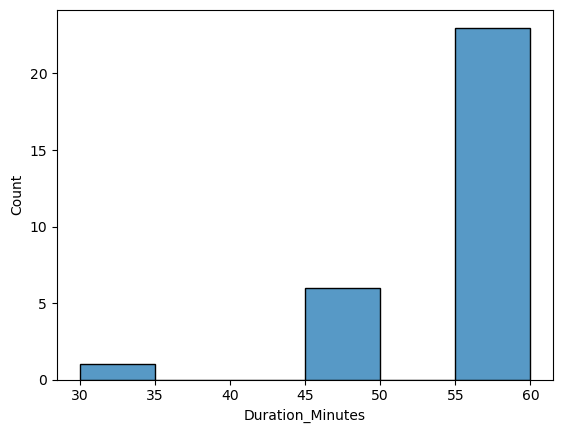

In [41]:
sns.histplot(df['Duration_Minutes'])
plt.show()

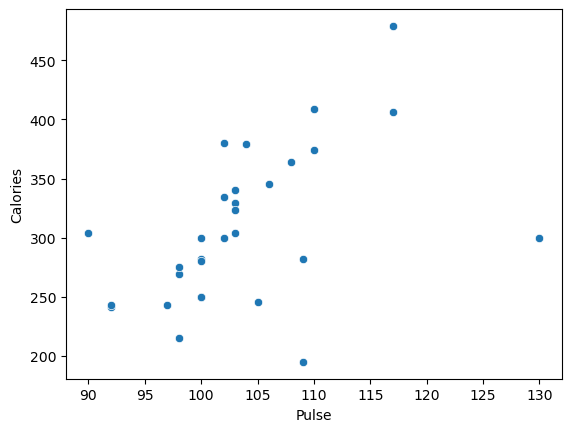

In [45]:
sns.scatterplot(x='Pulse', y='Calories', data=df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

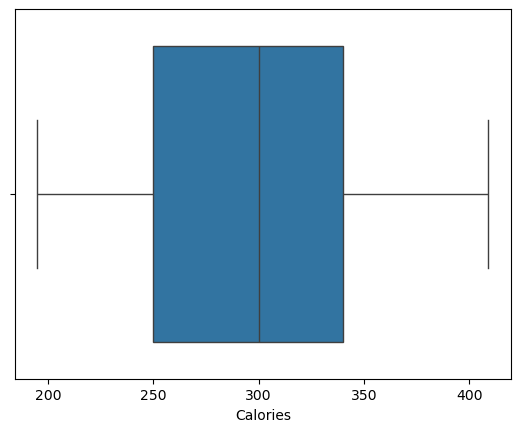

In [51]:
sns.boxplot(x='Calories', data= df)
plt.show

In [55]:
# Group by intensity category and calculate average calories burned

df.groupby('Intensity_Category')['Calories'].mean().reset_index()

,Intensity_Category,Calories
0,High,303.000000
1,Moderate,301.214286


In [60]:
# Group by day of week and calculate average calories burned


df.groupby('Day_of_Week')['Calories'].mean().reset_index()

,Day_of_Week,Calories
0,Friday,312.250000
1,Monday,340.600000
2,Saturday,307.250000
3,Sunday,282.250000
4,Thursday,279.600000
5,Tuesday,321.333333
6,Wednesday,272.500000
